<a href="https://colab.research.google.com/github/IAMPathak2702/californiahousepricing/blob/main/End_to_End_ML_Project_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

## Let's load the Housing Price Dataset!!

In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

In [3]:
type(housing)

sklearn.utils._bunch.Bunch

In [4]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [6]:
data = pd.DataFrame(housing.data , columns = housing.feature_names)

In [7]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [8]:
data["price"] = housing.target

In [9]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Summarising the Data

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [11]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
price,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


### Check the missing values

In [12]:
data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

# Exploratory Data Analysis

## Check data corelation

In [13]:
data.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

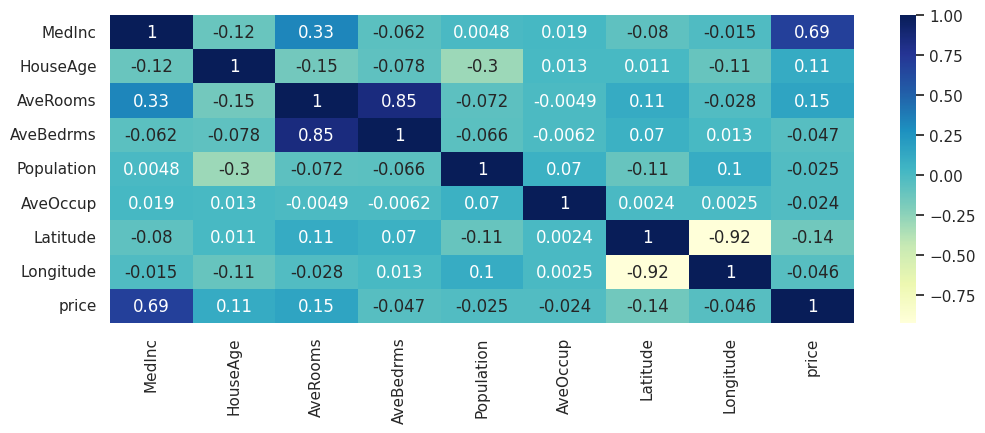

In [14]:
plt.figure(figsize = (12,4))
sns.heatmap(data.corr() , cmap="YlGnBu" , annot = True , cbar= True)


## Analyze the Correlations amongs the dataset

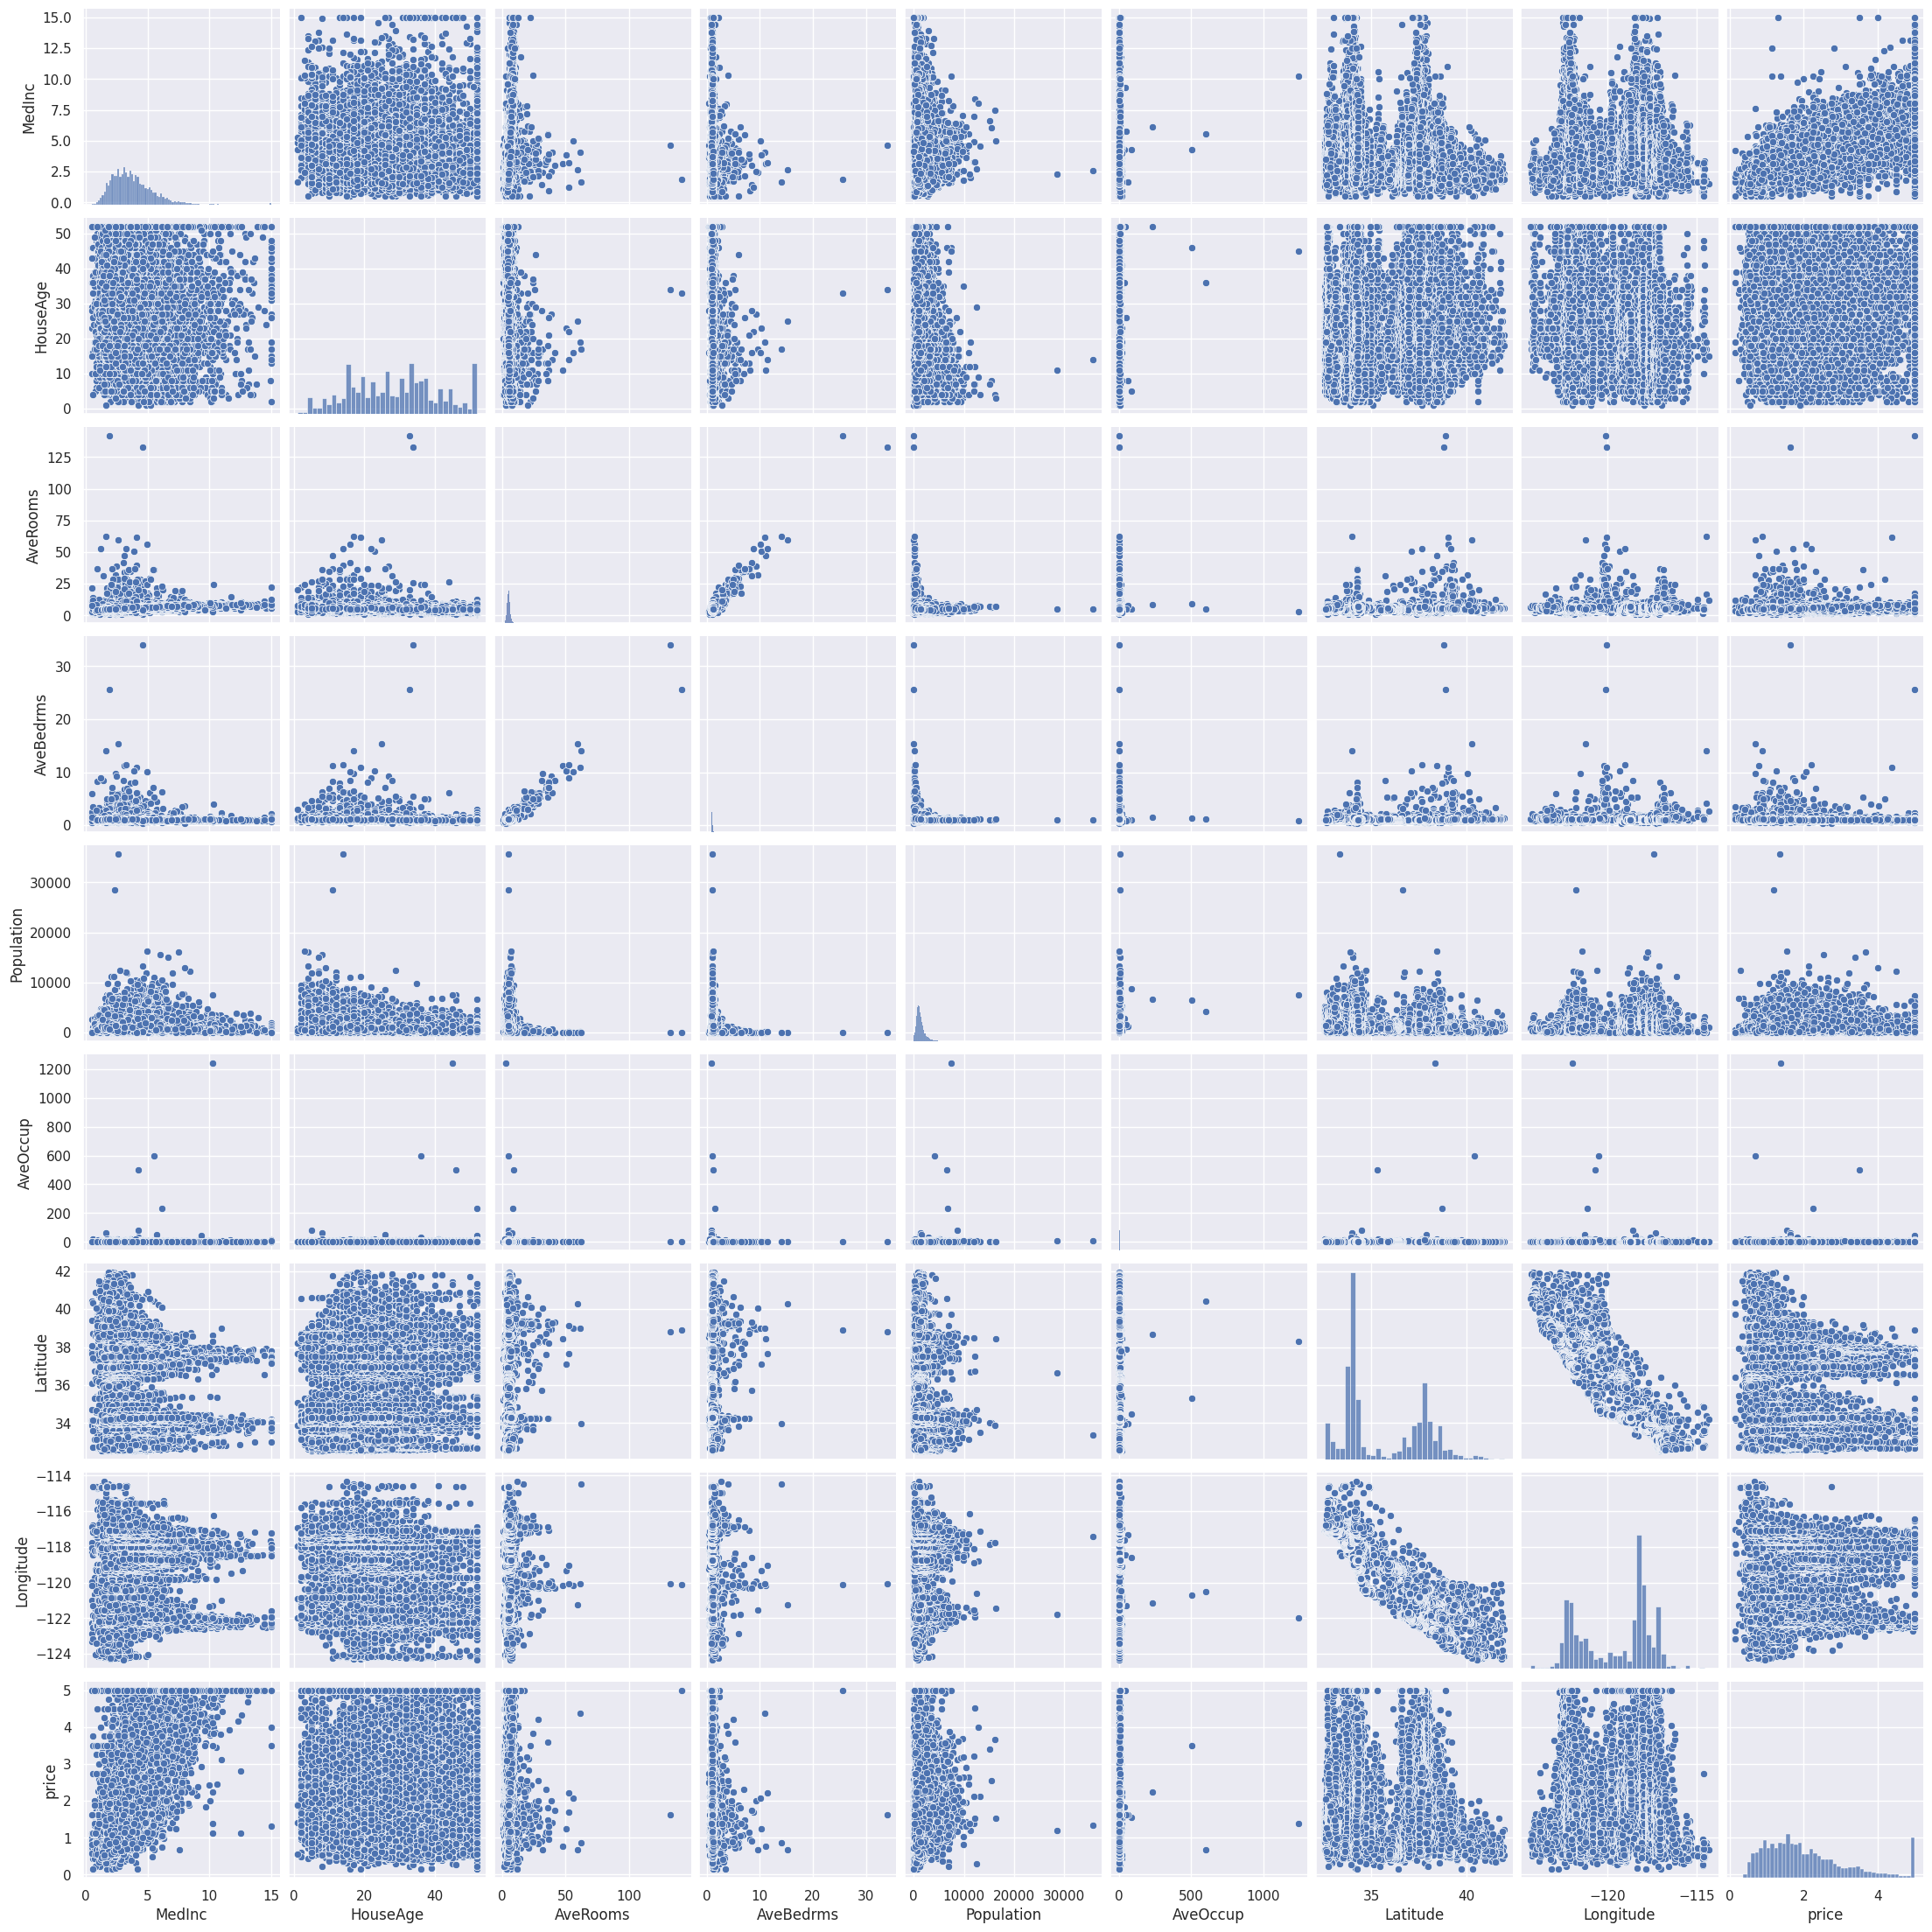

In [15]:
sns.pairplot(data)

Text(0, 0.5, 'Avg Room')

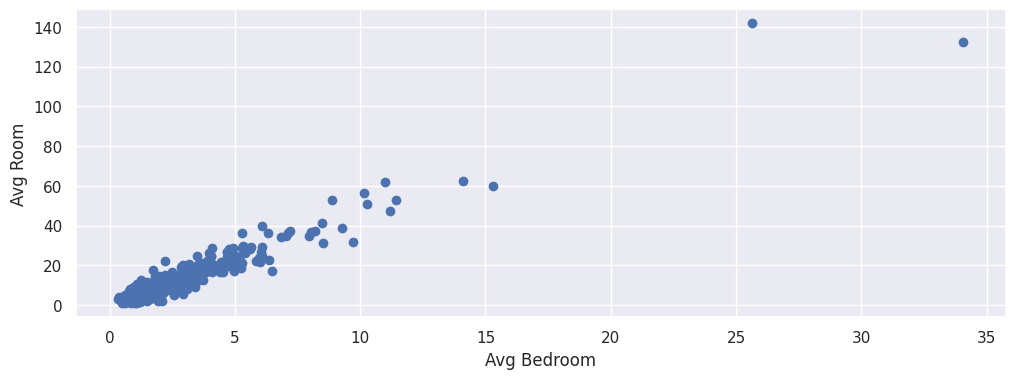

In [16]:
plt.figure(figsize = (12,4))
plt.scatter(data['AveBedrms'], data['AveRooms'])
plt.xlabel("Avg Bedroom")
plt.ylabel("Avg Room")

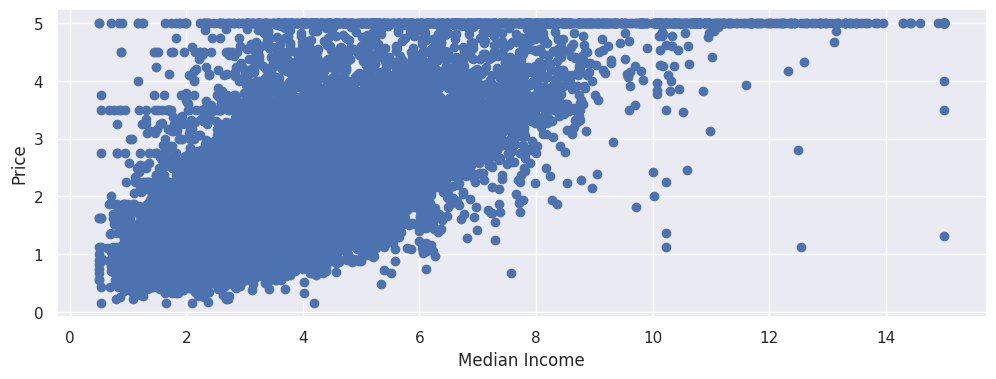

In [17]:
plt.figure(figsize = (12,4))
plt.scatter(data['MedInc'],data["price"])
plt.xlabel('Median Income')
plt.ylabel('Price')
plt.show();

(0.0, 6.0)

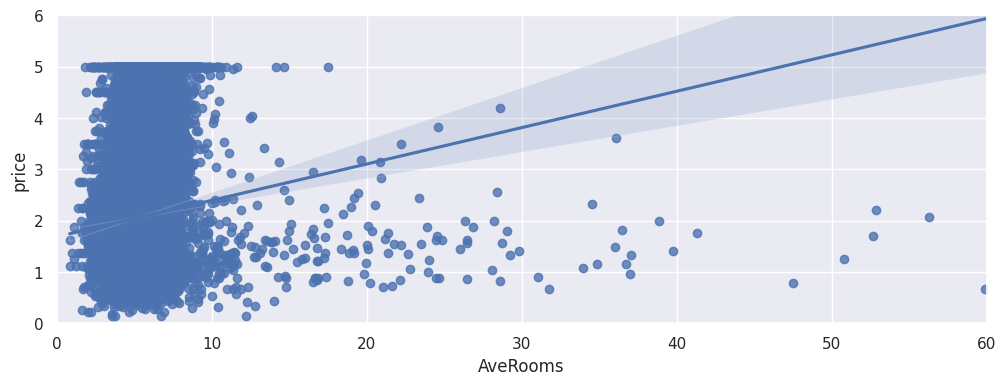

In [18]:
plt.figure(figsize = (12,4))
sns.regplot(x="AveRooms" , y = "price" , data = data )
plt.xlim(0,60)
plt.ylim(0,6)

(0.0, 6.0)

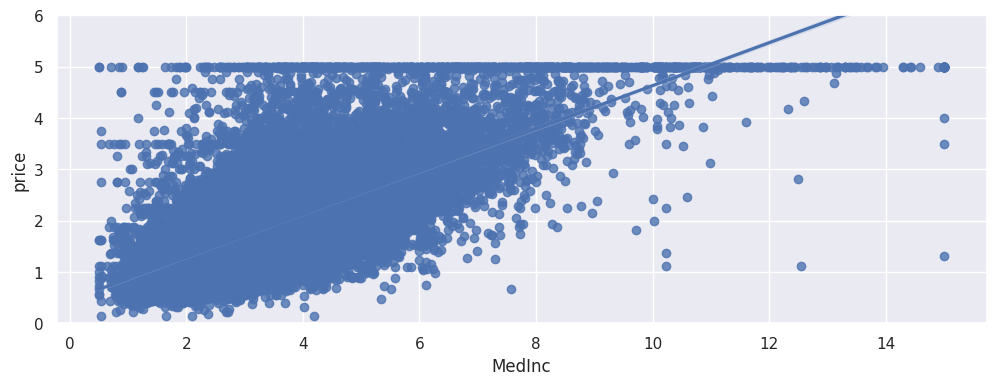

In [19]:
plt.figure(figsize = (12,4))
sns.regplot(x="MedInc" , y = "price" , data = data )
plt.ylim(0,6)

## Independent and Dependent Features


In [20]:
X = data.drop("price", axis=1)  # Features (all columns except "price")
y = data["price"]  # Target variable

X.shape , y.shape

((20640, 8), (20640,))

In [21]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y , test_size=0.1, random_state = 42)

In [22]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((18576, 8), (2064, 8), (18576,), (2064,))

## Standardizing the data

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [24]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
X_train

array([[-0.01883674,  0.98351287, -0.06631495, ..., -0.00644337,
        -0.80886286,  0.64130268],
       [ 2.18523706,  1.85679302,  0.71274435, ..., -0.04432463,
         0.9803686 , -1.43975779],
       [-0.10658316,  0.11023273, -0.70528414, ..., -0.06848073,
         0.8539046 , -1.28505066],
       ...,
       [-0.4960504 ,  0.58656735, -0.57528621, ...,  0.02277384,
        -0.75265664,  0.5963877 ],
       [ 0.97597509, -1.08060383,  0.38303597, ...,  0.0087576 ,
         0.91011082, -1.19023016],
       [-0.68576239,  1.85679302, -0.80769828, ..., -0.08916877,
         0.99910401, -1.41979558]])

In [26]:
X_test

array([[-1.15848302, -0.28671279, -0.49353058, ...,  0.0726769 ,
         0.19816532,  0.28198288],
       [-0.7091262 ,  0.11023273, -0.1564619 , ..., -0.03691135,
        -0.23274907,  0.05740801],
       [-0.20759726,  1.85679302, -0.57909086, ..., -0.15764648,
         1.01315557, -1.42977669],
       ...,
       [ 1.04923807, -0.60426921,  1.28095889, ...,  0.03444591,
        -0.63556034,  0.4067467 ],
       [-0.85496498,  0.82473466, -0.5166131 , ...,  0.0511494 ,
        -0.74797279,  0.62633102],
       [-0.19972122,  0.50717825, -0.18943013, ..., -0.01846169,
        -0.72923738,  0.9656886 ]])

# Model Training

In [27]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [28]:
regression.fit(X_train,y_train)

LinearRegression()

## print the coefficients

In [29]:
print(regression.coef_)

[ 0.83550745  0.12060995 -0.277395    0.31640237 -0.00492768 -0.03955887
 -0.89392801 -0.86512867]


In [30]:
print(regression.intercept_)

2.0686173923341893


In [31]:
## on which parameter which model has beeb trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [32]:
reg_predict = regression.predict(X_test)
reg_predict

array([0.73044235, 1.75506423, 2.67574887, ..., 2.71053343, 1.69520471,
       1.7414053 ])

## Compare Results!!

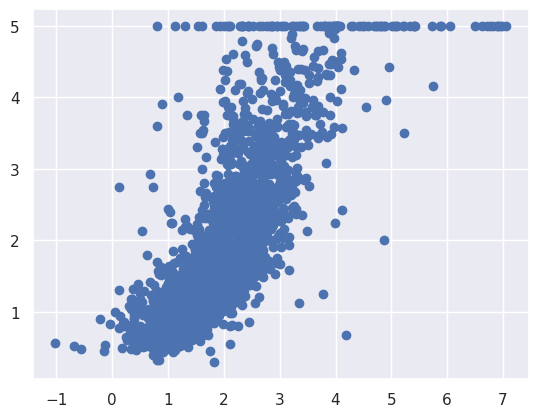

In [33]:
#scatter plot for Prediction
plt.scatter(reg_predict , y_test)

In [34]:
residuals = y_test-reg_predict

In [35]:
residuals

20046   -0.253442
3024    -1.297064
15663    2.324261
20484   -0.660681
9814     0.167866
           ...   
9477    -0.951151
46      -0.447576
20462   -0.047533
4751    -0.045205
13298   -0.561405
Name: price, Length: 2064, dtype: float64

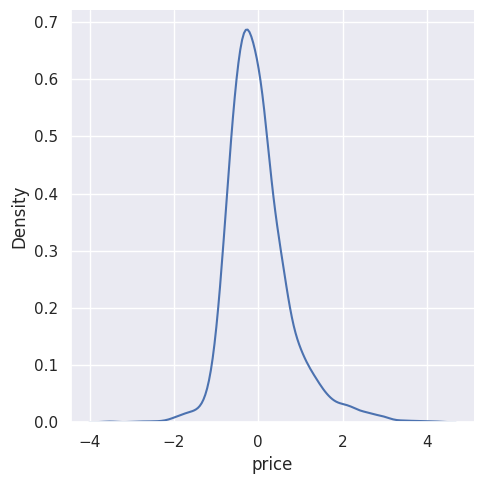

In [36]:
sns.displot(residuals ,kind = "kde")

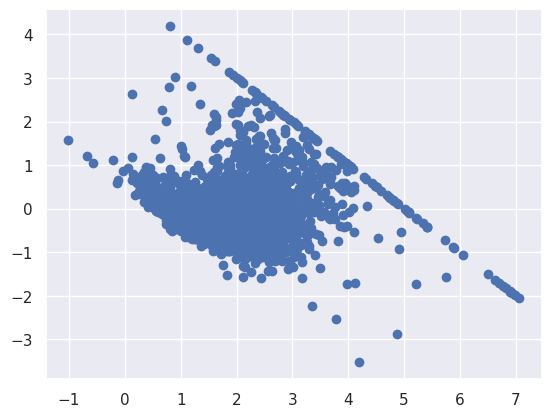

In [37]:
# Scatter
#uniform distribution
plt.scatter(reg_predict , residuals)

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming y_test and reg_predict are the true and predicted values, respectively
mae = mean_absolute_error(y_test, reg_predict)
mse = mean_squared_error(y_test, reg_predict)
rmse = mean_squared_error(y_test, reg_predict, squared=False)  # Calculate RMSE from MSE
r2 = r2_score(y_test, reg_predict)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Mean Absolute Error: 0.5423972782283895
Mean Squared Error: 0.5590019245025631
Root Mean Squared Error: 0.747664312711636
R-squared: 0.5808353312067694


In [40]:
def adjusted_r_squared(y_true, y_pred, n, k):
    r_squared = r2_score(y_true, y_pred)
    adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - k - 1))
    return adjusted_r_squared

#y_test and reg_predict are the true and predicted values, respectively
n = len(y_test)
k = X_test.shape[1]  # Number of predictors
adj_r2 = adjusted_r_squared(y_test, reg_predict, n, k)

print("Adjusted R-squared:", adj_r2)


Adjusted R-squared: 0.579203546608061


# New Data Prediction

In [41]:
housing.data[0].reshape(1,-1)

array([[   8.3252    ,   41.        ,    6.98412698,    1.02380952,
         322.        ,    2.55555556,   37.88      , -122.23      ]])

In [42]:
regression.predict(scaler.transform(housing.data[0].reshape(1,-1)))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.14837785])

# Saving the model


In [43]:
import pickle

pickle.dump(regression , open("regmodel.pkl", "wb"))

In [44]:
pickled_model = pickle.load(open('regmodel.pkl',"rb"))

In [45]:
pickled_model.predict(scaler.transform(housing.data[0].reshape(1,-1)))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.14837785])